<font size="+3.8">Scanpy single-cell pre-processing</font>  
<font size="+1.5"></font>  

sfrerich

Aim: Preprocess annotated human brain single-cell data from Siletti 2022 bioRxiv

In [1]:
import sys
import os, fnmatch 

In [2]:
import anndata
import scanpy as sc
import scipy as sci
#sc.logging.print_versions()

In [3]:
sc.settings.verbosity = 3

In [4]:
import loompy

In [5]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb
import datetime
now = datetime.datetime.now()
today = now.strftime("%Y%m%d")

In [6]:
from datetime import date
from matplotlib.pyplot import rc_context

In [7]:
os.getcwd()

'/cluster2/sfrerich/jupyter/p6-foxf2-per-celltype'

In [8]:
main_dir='/run/user/1000/gvfs/smb-share:server=138.245.4.35,share=bd-dichgans/SF' # Linux
main_dir='\\\isdsynnas.srv.med.uni-muenchen.de\BD-Dichgans\SF' # Win

In [9]:
main_dir='/cluster2/sfrerich/jupyter/p6-foxf2-per-celltype/data' # HPC

# Load + format data

Annotated by authors

### All cells

All superclusters downloaded from cellxgene https://cellxgene.cziscience.com/collections/283d65eb-dd53-496d-adb7-7570c7caa443 
(23/02/2023) except for Miscancelleous

In [10]:
f=os.listdir(os.path.join(main_dir+'/P6_vasc_scRNAseq/Siletti2022/all_cellxgene'))
f

['CGE-interneuron.h5ad',
 'Deep-layer-near-projecting.h5ad',
 'splatter-neurons.h5ad',
 'Lower-rhombic-lip.h5ad',
 'Thalamic-excitatory.h5ad',
 'MGE-interneuron.h5ad',
 'Medium-spiny-neuron.h5ad',
 'Mammillary-body.h5ad',
 'LAMP5-LHX6-and-Chandelier.h5ad',
 'Hippocampal-CA4.h5ad',
 'nonneuronal.h5ad',
 'Hippocampal-CA1-3.h5ad',
 'deep-layer-intratelencephalic.h5ad',
 'Deep-layer-corticothalamic-and-6b.h5ad',
 'Hippocampal-dentate-gyrus.h5ad',
 'Amygdala-excitatory.h5ad',
 'Upper-rhombic-lip.h5ad',
 'Eccentric-medium-spiny-neuron.h5ad',
 'Cerebellar-inhibitory.h5ad',
 'upper-layer-intratelencephalic.h5ad',
 'Midbrain-derived-inhibitory.h5ad']

In [11]:
# load, format each file into smaller object, normalize, export
for p in f:
    adata = anndata.read_h5ad(os.path.join(main_dir+'/P6_vasc_scRNAseq/Siletti2022/all_cellxgene',p))
    adatas = adata[adata.obs["BadCells"] == 0]
    adata = adata[adata.obs["tissue"] != "Spinal cord"]
    adata.obs = adata.obs[["supercluster_term", "cell_type", "assay", "organism", "disease", "tissue", "BadCells"]]
    adata.var = adata.var[["Gene","feature_name"]]
    del adata.uns
    adata.var_names = adata.var["Gene"].tolist()
    adata.obs_names_make_unique()
    adata.var_names_make_unique()
    # log-normalize
    #adata.layers["counts"] = adata.X.copy()
    sc.pp.normalize_total(adata,inplace=True)
    sc.pp.log1p(adata)
    #adata.layers["normalized"] = adata.X.copy()
    adata.write_h5ad(os.path.join(main_dir+'/P6_vasc_scRNAseq/Siletti2022/all_reduced_normalized',p.split(".")[0]+'_reduced.h5ad'))

/cluster2/sfrerich/miniconda3/envs/scanpy/lib/python3.10/site-packages/anndata/utils.py:111: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


normalizing counts per cell
    finished (0:00:04)
normalizing counts per cell


/cluster2/sfrerich/miniconda3/envs/scanpy/lib/python3.10/site-packages/anndata/utils.py:111: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


    finished (0:00:00)


/cluster2/sfrerich/miniconda3/envs/scanpy/lib/python3.10/site-packages/anndata/utils.py:111: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


normalizing counts per cell
    finished (0:00:06)
normalizing counts per cell


/cluster2/sfrerich/miniconda3/envs/scanpy/lib/python3.10/site-packages/anndata/utils.py:111: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


    finished (0:00:01)


/cluster2/sfrerich/miniconda3/envs/scanpy/lib/python3.10/site-packages/anndata/utils.py:111: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


normalizing counts per cell
    finished (0:00:02)


/cluster2/sfrerich/miniconda3/envs/scanpy/lib/python3.10/site-packages/anndata/utils.py:111: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


normalizing counts per cell
    finished (0:00:04)


/cluster2/sfrerich/miniconda3/envs/scanpy/lib/python3.10/site-packages/anndata/utils.py:111: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


normalizing counts per cell
    finished (0:00:03)
normalizing counts per cell


/cluster2/sfrerich/miniconda3/envs/scanpy/lib/python3.10/site-packages/anndata/utils.py:111: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


    finished (0:00:00)
normalizing counts per cell


/cluster2/sfrerich/miniconda3/envs/scanpy/lib/python3.10/site-packages/anndata/utils.py:111: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


    finished (0:00:00)
normalizing counts per cell


/cluster2/sfrerich/miniconda3/envs/scanpy/lib/python3.10/site-packages/anndata/utils.py:111: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


    finished (0:00:00)


/cluster2/sfrerich/miniconda3/envs/scanpy/lib/python3.10/site-packages/anndata/utils.py:111: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


normalizing counts per cell
    finished (0:00:07)


/cluster2/sfrerich/miniconda3/envs/scanpy/lib/python3.10/site-packages/anndata/utils.py:111: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


normalizing counts per cell
    finished (0:00:02)


/cluster2/sfrerich/miniconda3/envs/scanpy/lib/python3.10/site-packages/anndata/utils.py:111: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


normalizing counts per cell
    finished (0:00:06)
normalizing counts per cell


/cluster2/sfrerich/miniconda3/envs/scanpy/lib/python3.10/site-packages/anndata/utils.py:111: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


    finished (0:00:03)
normalizing counts per cell


/cluster2/sfrerich/miniconda3/envs/scanpy/lib/python3.10/site-packages/anndata/utils.py:111: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


    finished (0:00:01)


/cluster2/sfrerich/miniconda3/envs/scanpy/lib/python3.10/site-packages/anndata/utils.py:111: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


normalizing counts per cell
    finished (0:00:02)
normalizing counts per cell


/cluster2/sfrerich/miniconda3/envs/scanpy/lib/python3.10/site-packages/anndata/utils.py:111: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


    finished (0:00:01)
normalizing counts per cell


/cluster2/sfrerich/miniconda3/envs/scanpy/lib/python3.10/site-packages/anndata/utils.py:111: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


    finished (0:00:00)
normalizing counts per cell


/cluster2/sfrerich/miniconda3/envs/scanpy/lib/python3.10/site-packages/anndata/utils.py:111: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


    finished (0:00:00)


/cluster2/sfrerich/miniconda3/envs/scanpy/lib/python3.10/site-packages/anndata/utils.py:111: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


normalizing counts per cell
    finished (0:00:15)
normalizing counts per cell


/cluster2/sfrerich/miniconda3/envs/scanpy/lib/python3.10/site-packages/anndata/utils.py:111: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


    finished (0:00:02)


In [ ]:
del adata

In [10]:
f=os.listdir(os.path.join(main_dir+'/P6_vasc_scRNAseq/Siletti2022/all_reduced_normalized'))
f

['upper-layer-intratelencephalic_reduced.h5ad',
 'splatter-neurons_reduced.h5ad',
 'CGE-interneuron_reduced.h5ad',
 'Deep-layer-near-projecting_reduced.h5ad',
 'Midbrain-derived-inhibitory_reduced.h5ad',
 'Amygdala-excitatory_reduced.h5ad',
 'LAMP5-LHX6-and-Chandelier_reduced.h5ad',
 'Medium-spiny-neuron_reduced.h5ad',
 'deep-layer-intratelencephalic_reduced.h5ad',
 'Hippocampal-CA1-3_reduced.h5ad',
 'Deep-layer-corticothalamic-and-6b_reduced.h5ad',
 'nonneuronal_reduced.h5ad',
 'Hippocampal-CA4_reduced.h5ad',
 'Lower-rhombic-lip_reduced.h5ad',
 'Cerebellar-inhibitory_reduced.h5ad',
 'MGE-interneuron_reduced.h5ad',
 'Upper-rhombic-lip_reduced.h5ad',
 'Hippocampal-dentate-gyrus_reduced.h5ad',
 'Eccentric-medium-spiny-neuron_reduced.h5ad',
 'Mammillary-body_reduced.h5ad',
 'Thalamic-excitatory_reduced.h5ad']

In [11]:
adatas = {p.split(".")[0]:anndata.read_h5ad(os.path.join(main_dir+'/P6_vasc_scRNAseq/Siletti2022/all_reduced_normalized',p)) for p in f}

In [12]:
adatas.keys()

dict_keys(['upper-layer-intratelencephalic_reduced', 'splatter-neurons_reduced', 'CGE-interneuron_reduced', 'Deep-layer-near-projecting_reduced', 'Midbrain-derived-inhibitory_reduced', 'Amygdala-excitatory_reduced', 'LAMP5-LHX6-and-Chandelier_reduced', 'Medium-spiny-neuron_reduced', 'deep-layer-intratelencephalic_reduced', 'Hippocampal-CA1-3_reduced', 'Deep-layer-corticothalamic-and-6b_reduced', 'nonneuronal_reduced', 'Hippocampal-CA4_reduced', 'Lower-rhombic-lip_reduced', 'Cerebellar-inhibitory_reduced', 'MGE-interneuron_reduced', 'Upper-rhombic-lip_reduced', 'Hippocampal-dentate-gyrus_reduced', 'Eccentric-medium-spiny-neuron_reduced', 'Mammillary-body_reduced', 'Thalamic-excitatory_reduced'])

In [13]:
adatas.values()

dict_values([AnnData object with n_obs × n_vars = 455006 × 59357
    obs: 'supercluster_term', 'cell_type', 'assay', 'organism', 'disease', 'tissue', 'BadCells'
    var: 'Gene', 'feature_name'
    uns: 'log1p'
    obsm: 'X_UMAP', 'X_tSNE', AnnData object with n_obs × n_vars = 291833 × 59357
    obs: 'supercluster_term', 'cell_type', 'assay', 'organism', 'disease', 'tissue', 'BadCells'
    var: 'Gene', 'feature_name'
    uns: 'log1p'
    obsm: 'X_UMAP', 'X_tSNE', AnnData object with n_obs × n_vars = 227671 × 59357
    obs: 'supercluster_term', 'cell_type', 'assay', 'organism', 'disease', 'tissue', 'BadCells'
    var: 'Gene', 'feature_name'
    uns: 'log1p'
    obsm: 'X_UMAP', 'X_tSNE', AnnData object with n_obs × n_vars = 18856 × 59357
    obs: 'supercluster_term', 'cell_type', 'assay', 'organism', 'disease', 'tissue', 'BadCells'
    var: 'Gene', 'feature_name'
    uns: 'log1p'
    obsm: 'X_UMAP', 'X_tSNE', AnnData object with n_obs × n_vars = 126782 × 59357
    obs: 'supercluster_term'

In [14]:
# merge - datasets too large
# adata2 = anndata.concat(adatas, axis=0, join="inner", merge="first")
# adata2

In [15]:
from anndata.experimental.multi_files import AnnCollection

/cluster2/sfrerich/miniconda3/envs/scanpy/lib/python3.10/site-packages/anndata/experimental/pytorch/_annloader.py:18: UserWarning: Сould not load pytorch.
  warnings.warn("Сould not load pytorch.")


In [16]:
adata2 = AnnCollection(adatas, join_vars='inner', label='dataset')

In [17]:
adata2

AnnCollection object with n_obs × n_vars = 3344148 × 59357
  constructed from 21 AnnData objects
    view of obsm: 'X_UMAP', 'X_tSNE'
    obs: 'supercluster_term', 'cell_type', 'assay', 'organism', 'disease', 'tissue', 'BadCells', 'dataset'

In [18]:
[i for i in adata2.var_names if "NOS3" in i]

['NOS3', 'NANOS3']

In [19]:
#adata3 = adata2.to_adata() # does not contain .X - must subset first into AnnCollectionView object

In [20]:
# subset genes
adata3 = adata2[:,adata2.var_names.isin(["FOXF2","FOXO1","TEK","NOS3"])]

In [21]:
adata3

AnnCollectionView object with n_obs × n_vars = 3344148 × 4
    obsm: 'X_UMAP', 'X_tSNE'
    obs: 'supercluster_term', 'cell_type', 'assay', 'organism', 'disease', 'tissue', 'BadCells', 'dataset'

In [22]:
adata3 = adata3.to_adata()

In [23]:
adata3

AnnData object with n_obs × n_vars = 3344148 × 4
    obs: 'supercluster_term', 'cell_type', 'assay', 'organism', 'disease', 'tissue', 'BadCells', 'dataset'
    obsm: 'X_UMAP', 'X_tSNE'

In [24]:
adata3.obsm["X_umap"] = adata3.obsm["X_UMAP"]

In [25]:
adata3.var_names

Index(['FOXO1', 'NOS3', 'TEK', 'FOXF2'], dtype='object')

In [26]:
del adata2

Check if data is normalized:

In [27]:
adata3.X.todense()

matrix([[0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.33328307, 0.        , 0.        , 0.        ]], dtype=float32)

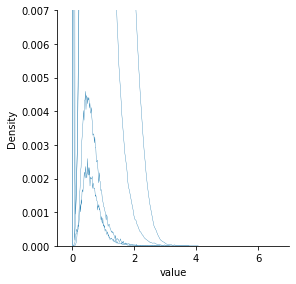

In [28]:
# show expression of genes (across all spots)
import random
import seaborn as sns
random_genes=random.sample(range(0, adata3.X.shape[1]), 4)
adata_sub = adata3[:,random_genes]
exp=pd.DataFrame(adata_sub.X.todense())
# plot
pl1=sns.displot(data=pd.melt(exp),x='value',height=4,hue='variable',kind="kde",warn_singular=False,legend=False,palette=list(np.repeat('#086da6',4)), lw=0.3) # genes with 0 expression are excluded
pl1.set(xlim=(-0.5, 7),ylim=(0,0.007))
sns.set_theme(style='white')
plt.show()

/tmp/ipykernel_48831/1501902166.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  pl=sns.histplot(data=pd.melt(exp),x='value',binwidth=0.5,legend=True,palette=list(np.repeat('#086da6',4)))


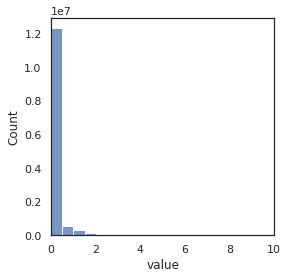

In [29]:
sns.set(rc={'figure.figsize':(4,4)})
sns.set_theme(style='white')
pl=sns.histplot(data=pd.melt(exp),x='value',binwidth=0.5,legend=True,palette=list(np.repeat('#086da6',4)))
pl.set(xlim=(0, 10));
plt.show()

In [30]:
pd.value_counts(adata3.obs["cell_type"])

neuron                                    2455885
oligodendrocyte                            494966
astrocyte                                  155025
oligodendrocyte precursor cell             105734
central nervous system macrophage           91838
fibroblast                                   9156
Bergmann glial cell                          8041
choroid plexus epithelial cell               7689
ependymal cell                               5882
endothelial cell                             5165
pericyte                                     3693
vascular associated smooth muscle cell       1074
Name: cell_type, dtype: int64

In [31]:
new_cluster_names = {'Bergmann glial cell':'Astrocytes',
                     'astrocyte':'Astrocytes',
                     'central nervous system macrophage':'Macrophages',
                     'choroid plexus epithelial cell':'Choroid plexus epithelial cells',
                     'endothelial cell':'Endothelial cells',
                     'ependymal cell':'Ependymal cells',
                     'fibroblast':'Fibroblasts',
                     'neuron':'Neurons',
                     'oligodendrocyte':'Oligos',
                     'oligodendrocyte precursor cell':'OPCs',
                     'pericyte':'Pericytes',
                     'vascular associated smooth muscle cell':'SMCs'}
#new_cluster_names=list(new_cluster_names.values())

In [32]:
adata3.obs['clusters'] = (
    adata3.obs['cell_type']
    .map(new_cluster_names)
    .astype('category')
)

In [33]:
pd.value_counts(adata3.obs["clusters"])

Neurons                            2455885
Oligos                              494966
Astrocytes                          163066
OPCs                                105734
Macrophages                          91838
Fibroblasts                           9156
Choroid plexus epithelial cells       7689
Ependymal cells                       5882
Endothelial cells                     5165
Pericytes                             3693
SMCs                                  1074
Name: clusters, dtype: int64

---

# Focus on: Foxf2

In [34]:
gene="FOXF2"

/cluster2/sfrerich/miniconda3/envs/scanpy/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


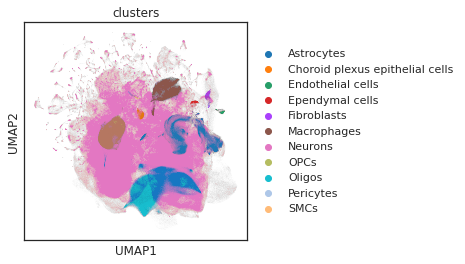

In [35]:
sc.pl.umap(adata3, color='clusters')

/cluster2/sfrerich/miniconda3/envs/scanpy/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


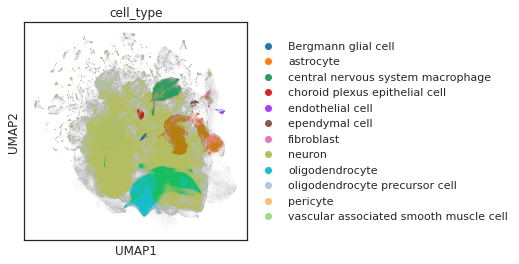

In [36]:
sc.pl.umap(adata3, color='cell_type')

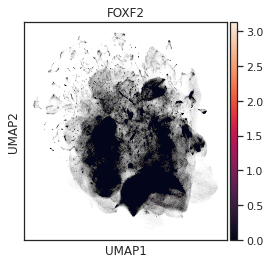

In [37]:
sc.pl.umap(adata3, color=gene)

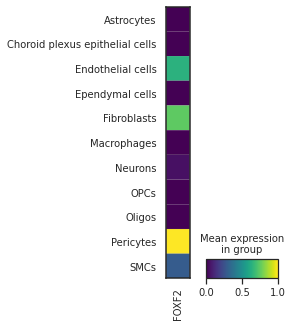

In [38]:
sc.pl.matrixplot(adata3, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var")

In [39]:
# mean expression per group (normalized and scaled)
ex = sc.pl.matrixplot(adata3, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", return_fig=True).values_df
ex.columns = ['mean_expression']
ex

,mean_expression
clusters,
Astrocytes,0.000600
Choroid plexus epithelial cells,0.000000
Endothelial cells,0.638464
Ependymal cells,0.002025
Fibroblasts,0.751317
Macrophages,0.000200
Neurons,0.042747
OPCs,0.000568
Oligos,0.000069


/cluster2/sfrerich/miniconda3/envs/scanpy/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


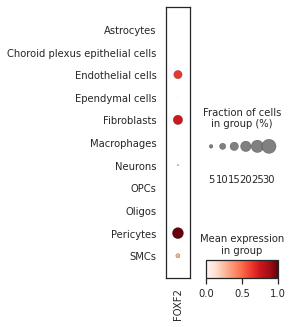

In [40]:
sc.pl.dotplot(adata3, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var")

In [41]:
# dotplot dot size = fraction of cells in group expressing Foxf2
fc = sc.pl.dotplot(adata3, [gene], groupby='clusters', swap_axes=False, figsize=(2,7), standard_scale="var",return_fig=True).dot_size_df
fc.columns = ['fraction_of_cells']
fc

,fraction_of_cells
clusters,
Astrocytes,0.000356
Choroid plexus epithelial cells,0.000260
Endothelial cells,0.147531
Ependymal cells,0.000680
Fibroblasts,0.173657
Macrophages,0.000120
Neurons,0.013643
OPCs,0.000350
Oligos,0.000101


In [42]:
foxf2 = pd.concat([ex, fc], axis=1)
foxf2['gene'] = gene
foxf2['source'] = "Siletti2022"
foxf2['organism'] = "Human"
foxf2['cell_number'] = pd.DataFrame(adata3.obs["clusters"].value_counts()).reindex(foxf2.index)
foxf2.index.name = "clusters"
foxf2

,mean_expression,fraction_of_cells,gene,source,organism,cell_number
clusters,,,,,,
Astrocytes,0.000600,0.000356,FOXF2,Siletti2022,Human,163066
Choroid plexus epithelial cells,0.000000,0.000260,FOXF2,Siletti2022,Human,7689
Endothelial cells,0.638464,0.147531,FOXF2,Siletti2022,Human,5165
Ependymal cells,0.002025,0.000680,FOXF2,Siletti2022,Human,5882
Fibroblasts,0.751317,0.173657,FOXF2,Siletti2022,Human,9156
Macrophages,0.000200,0.000120,FOXF2,Siletti2022,Human,91838
Neurons,0.042747,0.013643,FOXF2,Siletti2022,Human,2455885
OPCs,0.000568,0.000350,FOXF2,Siletti2022,Human,105734
Oligos,0.000069,0.000101,FOXF2,Siletti2022,Human,494966


In [43]:
# export
name='Siletti2022'

In [44]:
# Win
foxf2.to_csv(main_dir+'/Foxf2_summarized/'+ date.today().strftime("%Y%m%d")+'_'+name+'_normalized.csv',sep=';')

# Focus on: Foxo1

In [45]:
gene="FOXO1"

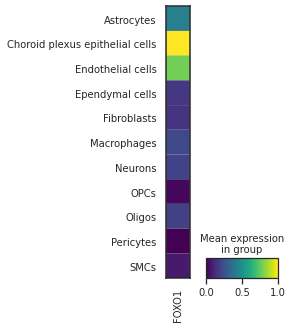

In [47]:
sc.pl.matrixplot(adata3, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var")

In [48]:
# mean expression per group (normalized and scaled)
ex = sc.pl.matrixplot(adata3, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", return_fig=True).values_df
ex.columns = ['mean_expression']
ex

,mean_expression
clusters,
Astrocytes,0.432923
Choroid plexus epithelial cells,1.000000
Endothelial cells,0.787537
Ependymal cells,0.157887
Fibroblasts,0.150373
Macrophages,0.217934
Neurons,0.195652
OPCs,0.020215
Oligos,0.194371


/cluster2/sfrerich/miniconda3/envs/scanpy/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


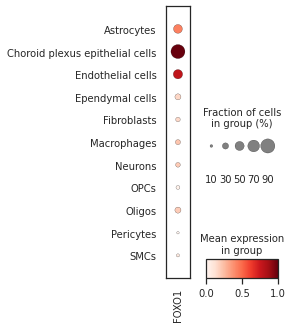

In [49]:
sc.pl.dotplot(adata3, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var")

In [50]:
# dotplot dot size = fraction of cells in group expressing Foxf2
fc = sc.pl.dotplot(adata3, [gene], groupby='clusters', swap_axes=False, figsize=(2,7), standard_scale="var",return_fig=True).dot_size_df
fc.columns = ['fraction_of_cells']
fc

,fraction_of_cells
clusters,
Astrocytes,0.480744
Choroid plexus epithelial cells,0.888282
Endothelial cells,0.513456
Ependymal cells,0.287997
Fibroblasts,0.197575
Macrophages,0.228511
Neurons,0.206007
OPCs,0.163136
Oligos,0.291119


In [51]:
foxf2 = pd.concat([ex, fc], axis=1)
foxf2['gene'] = gene
foxf2['source'] = "Siletti2022"
foxf2['organism'] = "Human"
foxf2['cell_number'] = pd.DataFrame(adata3.obs["clusters"].value_counts()).reindex(foxf2.index)
foxf2.index.name = "clusters"
foxf2

,mean_expression,fraction_of_cells,gene,source,organism,cell_number
clusters,,,,,,
Astrocytes,0.432923,0.480744,FOXO1,Siletti2022,Human,163066
Choroid plexus epithelial cells,1.000000,0.888282,FOXO1,Siletti2022,Human,7689
Endothelial cells,0.787537,0.513456,FOXO1,Siletti2022,Human,5165
Ependymal cells,0.157887,0.287997,FOXO1,Siletti2022,Human,5882
Fibroblasts,0.150373,0.197575,FOXO1,Siletti2022,Human,9156
Macrophages,0.217934,0.228511,FOXO1,Siletti2022,Human,91838
Neurons,0.195652,0.206007,FOXO1,Siletti2022,Human,2455885
OPCs,0.020215,0.163136,FOXO1,Siletti2022,Human,105734
Oligos,0.194371,0.291119,FOXO1,Siletti2022,Human,494966


In [52]:
# export
name='Siletti2022'

In [53]:
# Win
foxf2.to_csv(main_dir+'/Others_summarized/'+ date.today().strftime("%Y%m%d")+'_FOXO1_'+name+'_normalized.csv',sep=';')

# Focus on: Tek=Tie2

In [54]:
gene="TEK"

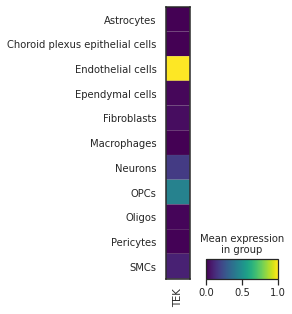

In [55]:
sc.pl.matrixplot(adata3, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var")

In [56]:
# mean expression per group (normalized and scaled)
ex = sc.pl.matrixplot(adata3, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", return_fig=True).values_df
ex.columns = ['mean_expression']
ex

,mean_expression
clusters,
Astrocytes,0.003129
Choroid plexus epithelial cells,0.001260
Endothelial cells,1.000000
Ependymal cells,0.017392
Fibroblasts,0.032726
Macrophages,0.000000
Neurons,0.172218
OPCs,0.438579
Oligos,0.014298


/cluster2/sfrerich/miniconda3/envs/scanpy/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


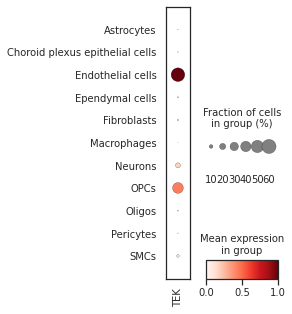

In [57]:
sc.pl.dotplot(adata3, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var")

In [58]:
# dotplot dot size = fraction of cells in group expressing Foxf2
fc = sc.pl.dotplot(adata3, [gene], groupby='clusters', swap_axes=False, figsize=(2,7), standard_scale="var",return_fig=True).dot_size_df
fc.columns = ['fraction_of_cells']
fc

,fraction_of_cells
clusters,
Astrocytes,0.007764
Choroid plexus epithelial cells,0.011835
Endothelial cells,0.572894
Ependymal cells,0.025502
Fibroblasts,0.029926
Macrophages,0.002733
Neurons,0.147453
OPCs,0.419127
Oligos,0.019070


In [59]:
foxf2 = pd.concat([ex, fc], axis=1)
foxf2['gene'] = gene
foxf2['source'] = "Siletti2022"
foxf2['organism'] = "Human"
foxf2['cell_number'] = pd.DataFrame(adata3.obs["clusters"].value_counts()).reindex(foxf2.index)
foxf2.index.name = "clusters"
foxf2

,mean_expression,fraction_of_cells,gene,source,organism,cell_number
clusters,,,,,,
Astrocytes,0.003129,0.007764,TEK,Siletti2022,Human,163066
Choroid plexus epithelial cells,0.001260,0.011835,TEK,Siletti2022,Human,7689
Endothelial cells,1.000000,0.572894,TEK,Siletti2022,Human,5165
Ependymal cells,0.017392,0.025502,TEK,Siletti2022,Human,5882
Fibroblasts,0.032726,0.029926,TEK,Siletti2022,Human,9156
Macrophages,0.000000,0.002733,TEK,Siletti2022,Human,91838
Neurons,0.172218,0.147453,TEK,Siletti2022,Human,2455885
OPCs,0.438579,0.419127,TEK,Siletti2022,Human,105734
Oligos,0.014298,0.019070,TEK,Siletti2022,Human,494966


In [60]:
# export
name='Siletti2022'

In [61]:
# Win
foxf2.to_csv(main_dir+'/Others_summarized/'+ date.today().strftime("%Y%m%d")+'_TEK_'+name+'_normalized.csv',sep=';')

# Focus on: eNOS=NOS3

In [62]:
gene="NOS3"

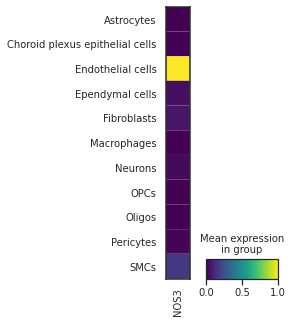

In [63]:
sc.pl.matrixplot(adata3, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var")

In [64]:
# mean expression per group (normalized and scaled)
ex = sc.pl.matrixplot(adata3, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", return_fig=True).values_df
ex.columns = ['mean_expression']
ex

,mean_expression
clusters,
Astrocytes,0.001526
Choroid plexus epithelial cells,0.005119
Endothelial cells,1.000000
Ependymal cells,0.038575
Fibroblasts,0.056987
Macrophages,0.001912
Neurons,0.024640
OPCs,0.000357
Oligos,0.000000


/cluster2/sfrerich/miniconda3/envs/scanpy/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


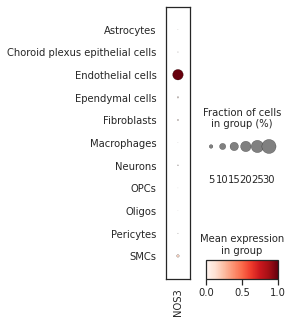

In [65]:
sc.pl.dotplot(adata3, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var")

In [66]:
# dotplot dot size = fraction of cells in group expressing Foxf2
fc = sc.pl.dotplot(adata3, [gene], groupby='clusters', swap_axes=False, figsize=(2,7), standard_scale="var",return_fig=True).dot_size_df
fc.columns = ['fraction_of_cells']
fc

,fraction_of_cells
clusters,
Astrocytes,0.000803
Choroid plexus epithelial cells,0.002731
Endothelial cells,0.204259
Ependymal cells,0.014111
Fibroblasts,0.012014
Macrophages,0.000523
Neurons,0.007164
OPCs,0.000426
Oligos,0.000307


In [67]:
foxf2 = pd.concat([ex, fc], axis=1)
foxf2['gene'] = gene
foxf2['source'] = "Siletti2022"
foxf2['organism'] = "Human"
foxf2['cell_number'] = pd.DataFrame(adata3.obs["clusters"].value_counts()).reindex(foxf2.index)
foxf2.index.name = "clusters"
foxf2

,mean_expression,fraction_of_cells,gene,source,organism,cell_number
clusters,,,,,,
Astrocytes,0.001526,0.000803,NOS3,Siletti2022,Human,163066
Choroid plexus epithelial cells,0.005119,0.002731,NOS3,Siletti2022,Human,7689
Endothelial cells,1.000000,0.204259,NOS3,Siletti2022,Human,5165
Ependymal cells,0.038575,0.014111,NOS3,Siletti2022,Human,5882
Fibroblasts,0.056987,0.012014,NOS3,Siletti2022,Human,9156
Macrophages,0.001912,0.000523,NOS3,Siletti2022,Human,91838
Neurons,0.024640,0.007164,NOS3,Siletti2022,Human,2455885
OPCs,0.000357,0.000426,NOS3,Siletti2022,Human,105734
Oligos,0.000000,0.000307,NOS3,Siletti2022,Human,494966


In [68]:
# export
name='Siletti2022'

In [69]:
# Win
foxf2.to_csv(main_dir+'/Others_summarized/'+ date.today().strftime("%Y%m%d")+'_NOS3_'+name+'_normalized.csv',sep=';')

# Session Info

In [70]:
sc.logging.print_versions()

-----
anndata     0.8.0
scanpy      1.9.1
-----
PIL                         9.4.0
asttokens                   NA
backcall                    0.2.0
cffi                        1.15.1
cycler                      0.10.0
cython_runtime              NA
dateutil                    2.8.2
debugpy                     1.5.1
decorator                   5.1.1
defusedxml                  0.7.1
entrypoints                 0.4
executing                   0.8.3
h5py                        3.8.0
ipykernel                   6.9.1
ipython_genutils            0.2.0
ipywidgets                  7.6.5
jedi                        0.18.1
joblib                      1.2.0
jupyter_server              1.23.4
kiwisolver                  1.4.4
llvmlite                    0.39.1
loompy                      3.0.7
matplotlib                  3.6.3
matplotlib_inline           NA
mpl_toolkits                NA
natsort                     8.2.0
numba                       0.56.4
numexpr                     2.8.4
numpy   